In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Import necessary libraries
import sys
from pathlib import Path
# Ensure the src directory is accessible
sys.path.append('./src')

# Get data

In [2]:
from get_data import get_data
data_split = get_data() 

Found local copy...
Loading...
Done!
100%|██████████| 13445/13445 [00:05<00:00, 2368.27it/s]

Data loaded and split successfully.
Train data samples: 9411
Validation data samples: 1344
Test data samples: 2690


# check data

In [3]:
data_split['train'].head(10)

,Drug_ID,Drug,Y
0,8640,O=C1NCCN1CC[N+]1CCC(c2cn(C3CCCCC3)c3ccc(Cl)cc2...,0
1,11377,O=C(Cc1ccc(-n2cnnn2)cc1)N1CCN(CCc2ccc3nonc3c2)CC1,1
2,1461,NC(=O)c1ncc(N[C@@H]2CCCC[C@@H]2N)cc1Nc1cccc(C(...,1
3,6646,Cc1cc(C)nc(Nc2cc(N[C@@H]3CCCC[C@@H]3N)cnc2C(N)...,1
4,379,COc1cc(C)nc(Nc2cc(N[C@@H]3CCCC[C@@H]3N)cnc2C(N...,1
5,10556,Cc1cc(CC(C)(C)O)cc(Nc2cc(N[C@@H]3CCCC[C@@H]3N)...,1
6,4542,Cc1cc(C(C)(C)O)cc(Nc2cc(N[C@@H]3CCCC[C@@H]3N)c...,1
7,9102,Cc1cccnc1CN1CCC2(CC1)C(=O)N(c1ccc(-c3ccc4scnc4...,1
8,4564,O=S1(=O)CCC(COc2ccc3c(c2)CCC2(CCN(C4CCC4)CC2)O...,0
9,12933,N#C[C@@H]1C[C@@H]2C[C@@H]2N1C(=O)[C@@H](N)C12C...,0


In [4]:
data_split['test'].head(10)

,Drug_ID,Drug,Y
0,7417,CC(C)c1noc(-c2nnc3n2CCN(C(=O)c2ccc(F)cc2)[C@@H...,1
1,3967,CCc1noc(-c2nnc3n2CCN(C(=O)c2ccc(F)cc2)[C@@H]3C)n1,0
2,13387,CC(C)(C)Cn1c(N)nc2ccc(-c3nc(C(C)(C)C)[nH]c3-c3...,0
3,10258,CC(C)(C)C1CCC2(CC1)CCN(c1ccc(OC(F)(F)F)cc1)C(=...,1
4,5612,CCN(CC)c1ccc2cc(C(=O)NCCCCN3CCC(Nc4nc5ccccc5n4...,1
5,6520,CN1CCC(COCc2cc(C(F)(F)F)cc(N3CCCC3)n2)(c2ccccc...,1
6,8954,CN1CCC(COCc2cc(C(F)(F)F)cc(N3CCC(C#N)C3)n2)(c2...,1
7,2983,FC(F)(F)c1cc(COCC2(c3ccccc3)CCNCC2)nc(N2CCCC2)c1,1
8,12756,OC1CCC(Nc2ncc3nc(Nc4c(F)cc(F)cc4F)n([C@@H]4CCO...,0
9,8043,O=C(N[C@@H]1C2CCN(CC2)[C@H]1Cc1cccnc1)c1cc2ccc...,0


# Featuring functions

In [29]:
from features import smiles_to_fp

# Prepare the data
def prepare_data(df):
    df['features'] = df['Drug'].apply(lambda x: smiles_to_fp(x))
    X = list(df['features'])
    y = df['Y'].values
    return X, y


# Prepare traing and test data

In [30]:
# make features
X_train, y_train = prepare_data(data_split['train'])
X_valid, y_valid = prepare_data(data_split['valid'])
X_test, y_test = prepare_data(data_split['test'])

# Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

# Evaluation on validation data

In [34]:
from evaluate import eval
y_pred = rf_model.predict(X_valid)
result = eval(y_valid, y_pred, verbose=True)

Accuracy: 0.7455357142857143
ROC AUC Score: 0.7476015350175887
Precision: 0.786833855799373
Recall: 0.7090395480225988
F1 Score: 0.7459138187221396
Matthews Correlation Coefficient: 0.49512610566159304
Specificity (Negative Prediction Accuracy): 0.7861635220125787


# Evaluation on test data

In [35]:
y_pred = rf_model.predict(X_test)
result = eval(y_test, y_pred, verbose=True)

Accuracy: 0.7869888475836431
ROC AUC Score: 0.7866272534819189
Precision: 0.7987321711568938
Recall: 0.7596081386586285
F1 Score: 0.7786790266512167
Matthews Correlation Coefficient: 0.5742977119801898
Specificity (Negative Prediction Accuracy): 0.8136463683052091


 # SimpleNN: Define the model

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(1024, 64),  # Assuming input features size of 1024
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 1),  # binary classification
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.layers(x)


# SimpleNN: Define loss

In [15]:

def nn_loss_func(outputs, targets):
    criterion = nn.BCELoss()
    classical_loss = criterion(outputs.squeeze(), targets.squeeze())
    
    return classical_loss 

# SimpleNN: Training

In [16]:
def train_epoch(model, X_train, y_train, optimizer, criterion):
    model.train()
    nn_optimizer.zero_grad()
    outputs = nn_model(X_train)  # Make sure X_train is a tensor
    loss = criterion(outputs, y_train)  # Ensure y_train is appropriately shaped
    loss.backward()
    nn_optimizer.step()
    return loss


In [17]:
from evaluate import eval

def eval_model(model, X_test, y_test, verbose=False):
    model.eval()

    # Disable gradient computation for testing (saves memory and computations)
    with torch.no_grad():
        outputs = model(X_test)

    # Convert outputs to predicted classes
    # For binary classification with a single output unit
    predictions = (outputs > 0.5).float()  # Threshold probabilities to classify as 1 or 0

    # Since you cannot use sklearn directly with tensors, you need to move data back to CPU and convert to numpy
    predictions = predictions.cpu().numpy()
    y_test = y_test.cpu().numpy()

    return eval(y_test, predictions, verbose=verbose)  



In [27]:
nn_model = SimpleNN()
nn_optimizer = optim.Adam(nn_model.parameters(), lr=0.001)

X_train = torch.tensor(X_train, dtype=torch.float32)  # Convert features to a float Tensor
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)  # Convert labels to a float Tensor
X_valid = torch.tensor(X_valid, dtype=torch.float32)  # Convert features to a float Tensor
y_valid = torch.tensor(y_valid, dtype=torch.float32).unsqueeze(1)  # Convert labels to a float Tensor

# Train the model
num_epochs = 100
total_losses = []
total_auc = []
for epoch in range(num_epochs):
    train_loss = train_epoch(nn_model, X_train, y_train, nn_optimizer, nn_loss_func)
    valid_metrics = eval_model(nn_model, X_valid, y_valid)
    total_losses.append(train_loss)
    total_auc.append(valid_metrics['roc_auc'])
    print(f"Epoch {epoch}, Train Loss: {train_loss:.4f}, Validation AUC: {valid_metrics['roc_auc']}")


Epoch 0, Train Loss: 0.6948, Validation AUC: 0.5
Epoch 1, Train Loss: 0.6912, Validation AUC: 0.5063026329815584
Epoch 2, Train Loss: 0.6880, Validation AUC: 0.5492751305830935
Epoch 3, Train Loss: 0.6846, Validation AUC: 0.5925007994883275
Epoch 4, Train Loss: 0.6808, Validation AUC: 0.6290240912482679
Epoch 5, Train Loss: 0.6764, Validation AUC: 0.6566464129623708
Epoch 6, Train Loss: 0.6714, Validation AUC: 0.6659471271719433
Epoch 7, Train Loss: 0.6658, Validation AUC: 0.6672929325231851
Epoch 8, Train Loss: 0.6596, Validation AUC: 0.6739819848630209
Epoch 9, Train Loss: 0.6527, Validation AUC: 0.6789388124933377
Epoch 10, Train Loss: 0.6452, Validation AUC: 0.6802846178445795
Epoch 11, Train Loss: 0.6371, Validation AUC: 0.6827230572433642
Epoch 12, Train Loss: 0.6285, Validation AUC: 0.682576484383328
Epoch 13, Train Loss: 0.6194, Validation AUC: 0.685334719113101
Epoch 14, Train Loss: 0.6100, Validation AUC: 0.6869869949898731
Epoch 15, Train Loss: 0.6005, Validation AUC: 0.6869

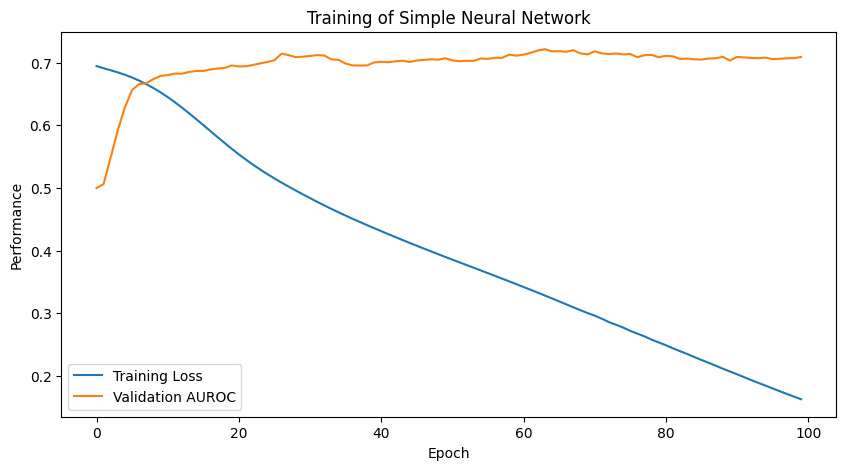

In [28]:
import matplotlib.pyplot as plt

# Converting tensors to lists of scalars
total_losses = [x.item() for x in total_losses]
total_auc = [x.item() for x in total_auc]

# Plotting the values
plt.figure(figsize=(10, 5))
plt.plot(total_losses, label='Training Loss')
plt.plot(total_auc, label='Validation AUROC')
plt.title('Training of Simple Neural Network')
plt.xlabel('Epoch')
plt.ylabel('Performance')
plt.legend()
plt.show()

# SimpleNN on Test Data

In [36]:
# convert to tensor
X_test = torch.tensor(X_test, dtype=torch.float32)  
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)  # Convert to tensor and ensure correct shape
result = eval_model(nn_model, X_test, y_test, verbose=True)

Accuracy: 0.762453531598513
ROC AUC Score: 0.7625254257060732
Precision: 0.7548148148148148
Recall: 0.7678975131876413
F1 Score: 0.7612999626447515
Matthews Correlation Coefficient: 0.525007458186019
Specificity (Negative Prediction Accuracy): 0.7571533382245048
